In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

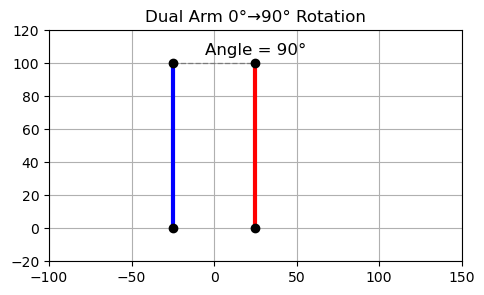

In [ ]:
# ===== パラメータ =====
d = 50.0  # モーター間距離 [mm]
l_1 = 100.0  # アームの長さ [mm]
frames = 91  # 0～90度の1度刻み

# ===== モーターの位置 =====
left_origin = np.array([-d/2, 0.0])
right_origin = np.array([d/2, 0.0])

# ===== アームの先端位置を計算する関数 =====
def arm_positions(angle_deg):
    # 左は左回りに回転（0°で真左）
    theta_L = np.radians(180 - angle_deg)
    # 右は右回りに回転（0°で真右）
    theta_R = np.radians(angle_deg)

    left_end = left_origin + l_1 * np.array([np.cos(theta_L), np.sin(theta_L)])
    right_end = right_origin + l_1 * np.array([np.cos(theta_R), np.sin(theta_R)])
    return left_end, right_end

# ===== アニメーションの準備 =====
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_xlim(- (d + l_1), d + l_1)
ax.set_ylim(-l_1 * 0.2, l_1 * 1.2)
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_title("Dual Arm 0°→90° Rotation")

# 棒と軸点の描画要素
left_line, = ax.plot([], [], 'b-', lw=3)
right_line, = ax.plot([], [], 'r-', lw=3)
joint_line, = ax.plot([], [], 'k--', lw=1, alpha=0.3)  # 棒先端をつなぐ線
points, = ax.plot([], [], 'ko', ms=6)  # 軸と先端点

text = ax.text(0.5 * d, l * 1.05, '', ha='center', fontsize=12)

# ===== 初期化関数 =====
def init():
    left_line.set_data([], [])
    right_line.set_data([], [])
    joint_line.set_data([], [])
    points.set_data([], [])
    text.set_text('')
    return left_line, right_line, joint_line, points, text

# ===== フレーム更新関数 =====
def update(frame):
    angle = frame  # 0〜90°
    left_end, right_end = arm_positions(angle)

    # 左棒
    left_line.set_data([left_origin[0], left_end[0]],
                       [left_origin[1], left_end[1]])
    # 右棒
    right_line.set_data([right_origin[0], right_end[0]],
                        [right_origin[1], right_end[1]])
    # 棒先端を結ぶ
    joint_line.set_data([left_end[0], right_end[0]],
                        [left_end[1], right_end[1]])

    # 点（軸×2＋先端×2）
    x_points = [left_origin[0], right_origin[0], left_end[0], right_end[0]]
    y_points = [left_origin[1], right_origin[1], left_end[1], right_end[1]]
    points.set_data(x_points, y_points)

    text.set_text(f"Angle = {angle:.0f}°")

    return left_line, right_line, joint_line, points, text

# ===== アニメーション生成 =====
ani = animation.FuncAnimation(
    fig, update, frames=frames, init_func=init, interval=50, blit=True
)
ani.save("dual_arm.gif", writer="pillow", fps=20)
plt.show()
